# EDA

> fuente: Air bnd New York

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns

### Empezamos leyendo con Pandas el archivo csv

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


1. train_date.describe().
- Este método genera estadísticas descriptivas que resumen la tendencia central, dispersión y forma de la distribución de cada columna 
- Para columnas numéricas muestra:
  count, mean (media), std (desviación estándar), min, percentiles (25%, 50% = mediana, 75%), y max 
- Para columnas de tipo “objeto” (strings, fechas…), usando include='all', muestra:
count, unique, top (valor más frecuente) y freq (frecuencia) 
2. El sufijo .T
T es un accesorio para .transpose(), que rota la tabla intercambiando filas por columnas

In [46]:
train_date = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
train_date.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


- False significa que esa fila no es un duplicado.
- True indicaría que esa fila sí es un duplicado de una fila previa.

In [47]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [48]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Obtendremos las dimensiones: vemos que tenemos 48895 filas y 16 columnas

In [49]:
df.shape

(48895, 16)

> Aqui vemos que la columna name tiene mas de un valor nulo, ya que nos devuelve True (16)
> Esto tambien nos muestra las filas donde esa columna esta vacia, por lo que procedemos a eliminarla.

In [50]:
df['name'].isnull().sum()
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


> Aqui tambien vemos todas las columnas con mas de un valor nulo

In [51]:
df.isnull().sum()[df.isnull().sum() > 0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

> Voy a empezar a rellenar los valores nulos, ya que no estoy segura de eliminarlos (de momento)

In [52]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [53]:
# Voy a rellenar valores nulos en 'reviews_per_month' con 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())



Valores nulos después de la limpieza:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### Conclusion
>
> Como se ve, hemos cambiado las columnas que tenian mas valores nulos 

> Voy a eliminar la columna name y host_name ya que para mi no me ayuda a predecir
precios de las habitaciones, ni hacer una clasificacion de tipo de habitacion 

In [54]:
# Eliminando name
df = df.drop(columns=['name'])

In [55]:
# Eliminando host_name
df = df.drop(columns = ['host_name'])

In [56]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [57]:
df.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [58]:
cat_cols = df.select_dtypes(include='object').columns
print("Columnas categóricas a codificar:")
print(cat_cols)

Columnas categóricas a codificar:
Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')


 > Estas son las columnas object que se deben convertir a números:
 > 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'

In [59]:
# Convertir 'last_review' a tipo fecha (si deseas usar partes de la fecha)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# Aplicamos One-Hot Encoding a las otras columnas categóricas
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)
# Resultado final
print("DataFrame convertido completamente a números")
print(df_encoded.head())


DataFrame convertido completamente a números
     id  host_id  latitude  longitude  price  minimum_nights  \
0  2539     2787  40.64749  -73.97237    149               1   
1  2595     2845  40.75362  -73.98377    225               1   
2  3647     4632  40.80902  -73.94190    150               3   
3  3831     4869  40.68514  -73.95976     89               1   
4  5022     7192  40.79851  -73.94399     80              10   

   number_of_reviews last_review  reviews_per_month  \
0                  9  2018-10-19               0.21   
1                 45  2019-05-21               0.38   
2                  0         NaT               0.00   
3                270  2019-07-05               4.64   
4                  9  2018-11-19               0.10   

   calculated_host_listings_count  ...  neighbourhood_Williamsbridge  \
0                               6  ...                         False   
1                               2  ...                         False   
2                      

### Haremos Plot para empezar a ver mejor los datos

/tmp/ipykernel_472/3809044840.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tipo de habitación')


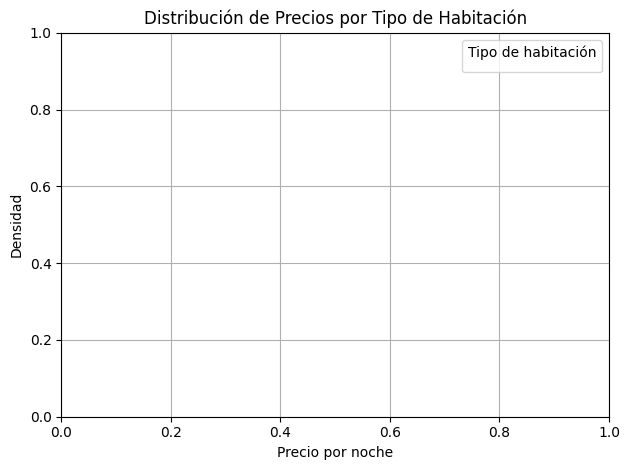

In [60]:
plt.title('Distribución de Precios por Tipo de Habitación')
plt.xlabel('Precio por noche')
plt.ylabel('Densidad')
plt.legend(title='Tipo de habitación')
plt.grid(True)
plt.tight_layout()
plt.show()

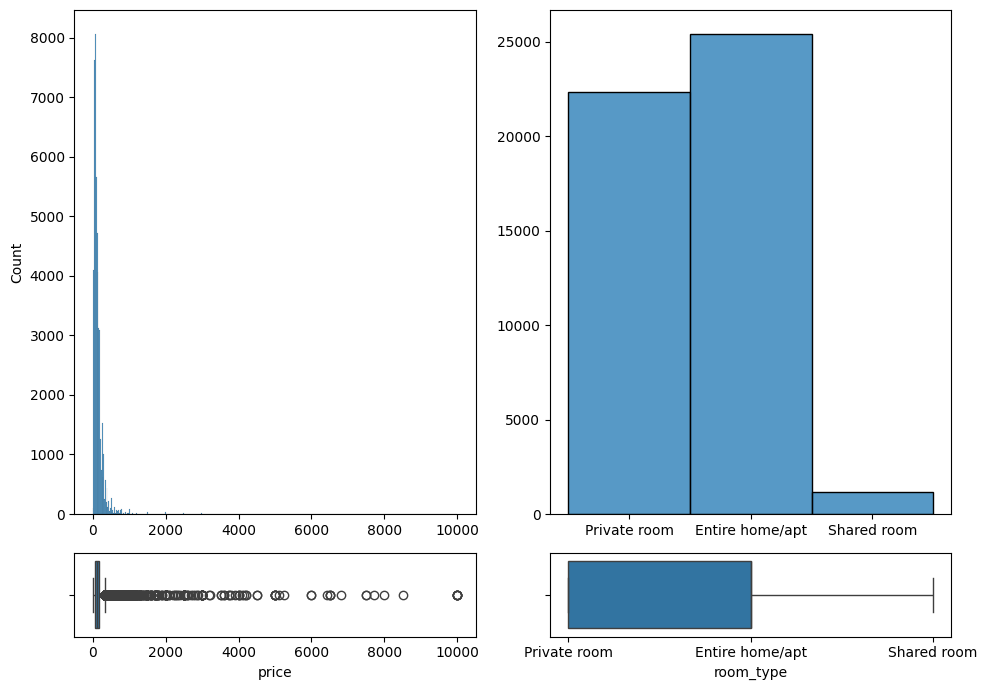

In [61]:
ig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")
sns.histplot(ax = axis[0, 1], data = df, x = "room_type").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "room_type")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

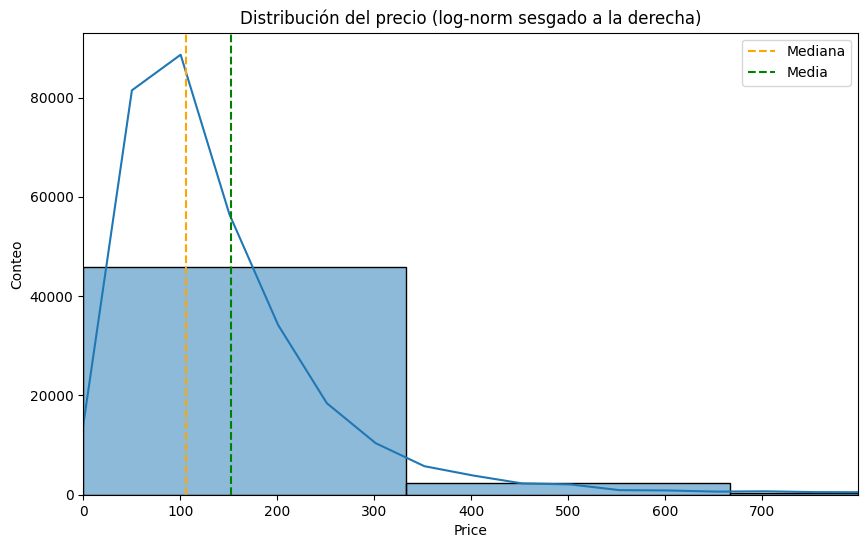

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=30, kde=True)
plt.axvline(df["price"].median(), color='orange', linestyle='--', label='Mediana')
plt.axvline(df["price"].mean(), color='green', linestyle='--', label='Media')
plt.xlabel('Price')
plt.ylabel('Conteo')
plt.title('Distribución del precio (log-norm sesgado a la derecha)')
plt.legend()
plt.xlim(0, df["price"].quantile(0.99))  # zoom hasta percentil 99 para ver mejor la estructura
plt.show()

### Explicaacion del grafico.
>
> Veo que las personas optaron por alquilar pisos valorados entre 0 y 300.
> En segundo lugar veo que también optaron por los precios entre 350 y casi 700.


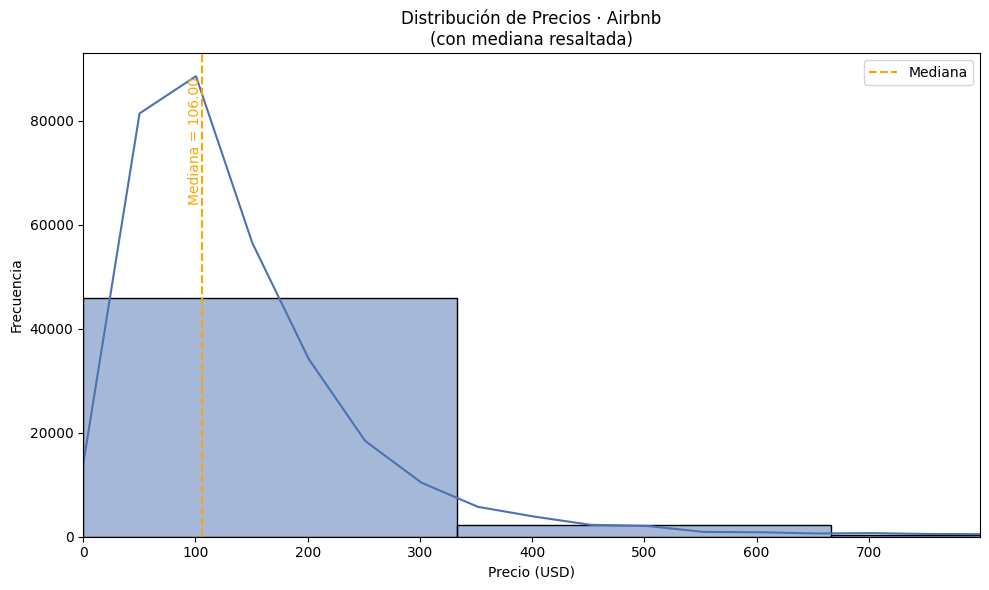

In [64]:
prices = df["price"]
# Calculamos la mediana
median = prices.median()

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(prices, bins=30, kde=True, ax=ax, color='#4c72b0')

# Línea vertical en la mediana
ax.axvline(median, color='orange', linestyle='--', label='Mediana')

# Añadir el texto con la mediana junto a la línea
ax.text(
    median,                   # posición x (valor de precio)
    0.95,                     # posición y (en proporción del eje y)
    f'Mediana = {median:.2f}', 
    color='orange',
    ha='right',
    va='top',
    rotation=90,
    transform=ax.get_xaxis_transform()
)

# Configuración estética
ax.set_title('Distribución de Precios · Airbnb\n(con mediana resaltada)')
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Frecuencia')
ax.legend()

# Opcional: limitar x hasta el percentil 99 para mejor visualización
x_limit = prices.quantile(0.99)
ax.set_xlim(0, x_limit)

plt.tight_layout()
plt.show()